In [7]:
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }
df = DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price'])
df

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256
5,2017,7,2.50,5.6,1254
6,2017,6,2.50,5.5,1234
7,2017,5,2.25,5.5,1195
8,2017,4,2.25,5.5,1159
9,2017,3,2.25,5.6,1167


[2.75 2.5  2.5  2.5  2.5  2.5  2.5  2.25 2.25 2.25 2.   2.   2.   1.75
 1.75 1.75 1.75 1.75 1.75 1.75 1.75 1.75 1.75 1.75]


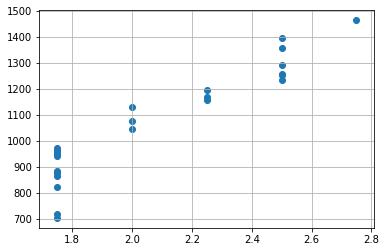

In [9]:
X = df.values[:, 2]
print(X)
Y = df.values[:, 4]
plt.scatter(X,Y)
plt.grid()
plt.show()

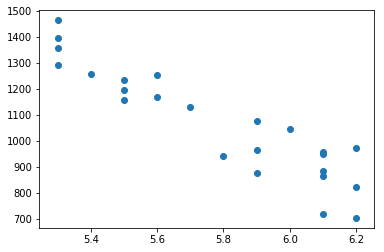

In [10]:
X = df.values[:, 3]
Y = df.values[:, 4]
plt.scatter(X,Y)
plt.show()

    Interest_Rate  Unemployment_Rate
0            2.75                5.3
1            2.50                5.3
2            2.50                5.3
3            2.50                5.3
4            2.50                5.4
5            2.50                5.6
6            2.50                5.5
7            2.25                5.5
8            2.25                5.5
9            2.25                5.6
10           2.00                5.7
11           2.00                5.9
12           2.00                6.0
13           1.75                5.9
14           1.75                5.8
15           1.75                6.1
16           1.75                6.2
17           1.75                6.1
18           1.75                6.1
19           1.75                6.1
20           1.75                5.9
21           1.75                6.2
22           1.75                6.2
23           1.75                6.1
[117.81070769 156.67849152]
[55.03891117 27.854944  ]
[array([87452.2577127

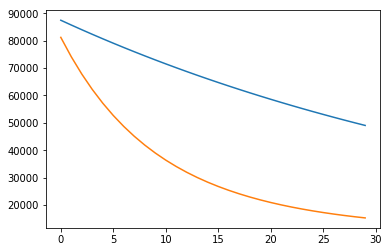

In [11]:
X = df[['Interest_Rate','Unemployment_Rate']]
print(X)
Y = df['Stock_Index_Price']
X = np.array(X)
# Gradient discent
def predict(x, w, b):
    return (w*x +b)
def cost_function(A,Y,w,b):
    n = len(X)
    sum_error = 0 
    for i in range(n):
        sum_error += (Y[i]-(w*X[i] + b))**2
        return sum_error/n
def update_weight(X,Y,w,b,learning_rate):
    n = len(X)
    w_temp = [0,0]
    b_temp = 0.0
    for i in range(n):
        w_temp += -2*X[i]*(Y[i]- (X[i]*w + b))
        b_temp +=-2*(Y[i]- (X[i]*w + b))
    w -= (w_temp/n)*learning_rate
    b -= (b_temp/n)*learning_rate
    return w,b
def train(X,Y,w,b,learning_rate, iter):
    cos_his = []
    for i in range(iter):
        w,b = update_weight(X ,Y ,w ,b ,learning_rate)
        cost = cost_function(X,Y,w,b)
        cos_his.append(cost)
    return w, b,cos_his
w,b,cost = train(X,Y,0.2,0.01,0.001,30)
print(w)
print(b)
print(cost)
print('gia tri du doan:')
print(predict(19,w,b))
sll = [i for i in range(30)]
plt.plot(sll,cost)
plt.show()



cost 0.47288092779722335; SLL 0
cost 0.26903061048359483; SLL 1
cost 0.15307965768101078; SLL 2
cost 0.08712624807151761; SLL 3
cost 0.04961165982609943; SLL 4
cost 0.02827319762460424; SLL 5
cost 0.016135786705759096; SLL 6
cost 0.00923197402150556; SLL 7
cost 0.00530505491601081; SLL 8
cost 0.0030714059054000706; SLL 9
cost 0.001800896334739927; SLL 10
cost 0.0010782246923562839; SLL 11
cost 0.0006671656609947683; SLL 12
cost 0.0004333532464479826; SLL 13
cost 0.0003003594832074627; SLL 14
cost 0.00022471181003314494; SLL 15
cost 0.00018168284385002573; SLL 16
cost 0.0001572075409547522; SLL 17
cost 0.00014328564293837574; SLL 18
cost 0.00013536656780769877; SLL 19
cost 0.00013086192461104457; SLL 20
cost 0.00012829942524795795; SLL 21
cost 0.00012684162580397463; SLL 22
cost 0.00012601218451577966; SLL 23
cost 0.00012554015610386654; SLL 24
cost 0.00012527142570755898; SLL 25
cost 0.00012511833211967596; SLL 26
cost 0.000125031013261956; SLL 27
cost 0.00012498110736608063; SLL 28
co

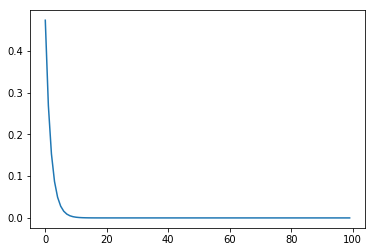

In [12]:

def simple_linear_regression(x_train, y_train):
    SLL = 100
    learning_rate = 0.01
    cos_his = []
    n = len(x_train)
    
    My = np.max(y_train)**2+1
    Mx = np.max(x_train)**2+1
    
    y = y_train/My
    x = x_train/Mx
    a_0 = 0
    a_1 = np.array([1,1])

    for i in range (SLL):
        
        y_pred = a_0 +  np.dot(a_1,x)
        error = y - y_pred
        D_a_1_1 = x * (y - y_pred) 
        D_a_0_0 = y - y_pred
        D_a_1 = (-2/n) * D_a_1_1.sum(axis=1)  
        D_a_0 = (-2/n) * D_a_0_0.sum(axis = 0) 
        
        a_1 = a_1 - learning_rate * D_a_1  
        a_0 = a_0 - learning_rate * D_a_0  
       
        
        cost = (1/n)*sum((y - y_pred)**2)
        cos_his.append(cost)
        print('cost {}; SLL {}'.format(cost,i))
        
    return a_1*My/Mx, a_0*My,cos_his
    
    
# test 1
#x_train = np.array([1, 2, 3, 4, 5])
#y_train = np.array([5, 7, 9, 11, 13])
# test 2
#x_train = np.array([147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183])
#y_train = np.array([ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68])

x_train = np.array(X).T
Y = df.values[:,4]
y_train = np.array(Y)

a_1, a_0,cos_his = simple_linear_regression(x_train, y_train)
y_pred = a_0 + np.dot(a_1,x_train)

plt.plot(cos_his)


In [13]:
x_train = np.array(X)
print(x_train)

[[2.75 5.3 ]
 [2.5  5.3 ]
 [2.5  5.3 ]
 [2.5  5.3 ]
 [2.5  5.4 ]
 [2.5  5.6 ]
 [2.5  5.5 ]
 [2.25 5.5 ]
 [2.25 5.5 ]
 [2.25 5.6 ]
 [2.   5.7 ]
 [2.   5.9 ]
 [2.   6.  ]
 [1.75 5.9 ]
 [1.75 5.8 ]
 [1.75 6.1 ]
 [1.75 6.2 ]
 [1.75 6.1 ]
 [1.75 6.1 ]
 [1.75 6.1 ]
 [1.75 5.9 ]
 [1.75 6.2 ]
 [1.75 6.2 ]
 [1.75 6.1 ]]


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

[1422.86238865 1336.47736689 1336.47736689 1336.47736689 1311.46270976
 1261.43339548 1286.44805262 1200.06303087 1200.06303087 1175.04837373
 1063.64869484 1013.61938057  988.60472343  927.23435881  952.24901595
  877.20504454  852.1903874   877.20504454  877.20504454  877.20504454
  927.23435881  852.1903874   852.1903874   877.20504454]
Intercept: 
 1798.4039776258546
Coefficients: 
 [ 345.54008701 -250.14657137]


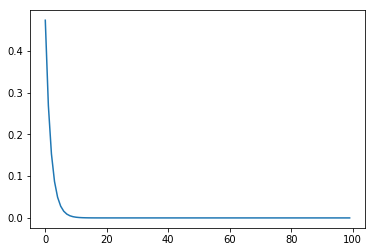

In [23]:
X = df[['Interest_Rate','Unemployment_Rate']]
Y = df['Stock_Index_Price']
reg = LinearRegression()
reg = reg.fit(X,Y)
Y_pred =reg.predict(X)
print(Y_pred)
print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_)
plt.plot(cos_his)
plt.show()